In [1]:
from random import randint
#@title Librerias
import numpy as np
from numpy import random
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad, trapezoid, simpson, nquad
from sympy import symbols, diff, integrate, lambdify

# Parcial II - Métodos Computacionales (Integrales y Matrices)
**2024-2**

---

*Nombre:*

*Identificación:*

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub (en su carpeta) y recuerde hacer pull-request

# 1

**(20 puntos)**
Considera la siguiente integral:

$$
I = \int_0^1 \int_{x^2}^{x+1} \int_{y^2}^{y+2} \int_{z^2}^{z+3} (x+y+z+w) \, dw \, dz \, dy \, dx
$$

Encuentre la solución númerica usando unicamente `quad`. Encuentre el error relativo, para esto emplee el siguiente código que usa `nquad`:


```python
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")
```



In [7]:
# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

In [2]:
def integrando(w, z, y, x):
    return x + y + z + w


w_g = lambda z: z**2
w_h = lambda z: z + 3

z_e = lambda y: y**2
z_f = lambda y: y + 2

y_c = lambda x: x**2
y_d = lambda x: x + 1


In [3]:

def Integral_w(z, y, x):
    return quad(lambda w: integrando(w, z, y, x), w_g(z), w_h(z))[0]


def Integral_z(y, x):
    return quad(lambda z: Integral_w(z, y, x), z_e(y), z_f(y))[0]


def Integral_y(x):
    return quad(lambda y: Integral_z(y, x), y_c(x), y_d(x))[0]


resultado, error = quad(lambda x: Integral_y(x), 0, 1)


In [4]:
resultado

-0.6500971589021813

In [8]:
result, error = nquad(
    integrando,
    [w_limits, z_limits, y_limits, x_limits]
)

In [9]:
#error relativo
error_r=abs(result-resultado)/result
error_r

-0.0

# 2

**(40 puntos)**
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo.


Para
* $a$ = 1,
* $I$ = 3,
* $μ0/4π$ = 1


Usando funciones explicitas explique claramente las entradas, salidas y procedimientos dentro de las mismas. Recuerde para resolver las integrales usar `quad` y grafique para:

*a)* $A_φ(r = 1.1, θ)$ vs. $0\leq θ\leq \pi$

*b)* $A_φ(r, θ = π∕3)$ vs. $0\leq r \leq 10$

Tenga cuidado con la convergencia de su integral



In [10]:
#definimos:
a=1
I=3
u=1

In [22]:
def k_f2(a,r,teta):
    return (4*a*r*np.sin(teta))/(a**2+r**2+2*a*r*np.sin(teta))

In [15]:
def K_int(k):
  integrand_k = lambda fi: 1/(np.sqrt(1-k**2*np.sin(fi)**2))
  return quad(integrand_k,0,np.pi/2)[0]


In [13]:
def E_int(k):
    integrand_e = lambda fi: np.sqrt(1 - k**2 * np.sin(fi)**2)
    return quad(integrand_e, 0, np.pi/2)[0]

In [25]:
def A(a,I,r,teta):
  #evaluamos las integrales
  k_new=k_f2(a,r,teta)
  k=np.sqrt(k_new)
  k_final=K_int(k)
  e_final=E_int(k)

  return (4*I*a)*((2-k**2)*k_final-2*e_final)/(k**2*(np.sqrt(a**2+r**2+2*a*r*np.sin(teta))))

<ipython-input-25-bf92c24e0a28>:8: RuntimeWarning: invalid value encountered in scalar divide
  return (4*I*a)*((2-k**2)*k_final-2*e_final)/(k**2*(np.sqrt(a**2+r**2+2*a*r*np.sin(teta))))


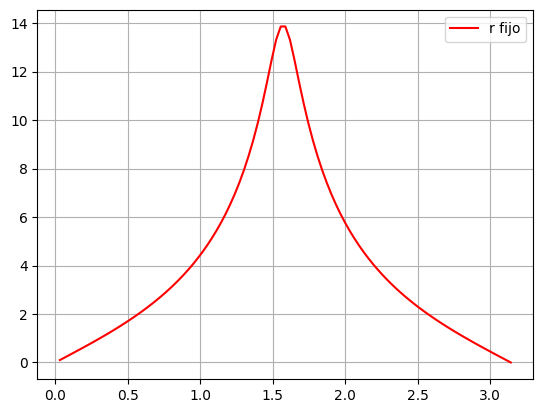

In [37]:
#datos para evaluar r fijo

teta_valores=np.linspace(0,np.pi,100)
r=1.1

#debemos hacer un array evaluado para graficar A

A_vector1= [A(a,I,r,teta)  for teta in teta_valores]

plt.plot(teta_valores,A_vector1,color='red',label='r fijo')
plt.legend()
plt.grid()
plt.show()

<ipython-input-25-bf92c24e0a28>:8: RuntimeWarning: invalid value encountered in scalar divide
  return (4*I*a)*((2-k**2)*k_final-2*e_final)/(k**2*(np.sqrt(a**2+r**2+2*a*r*np.sin(teta))))


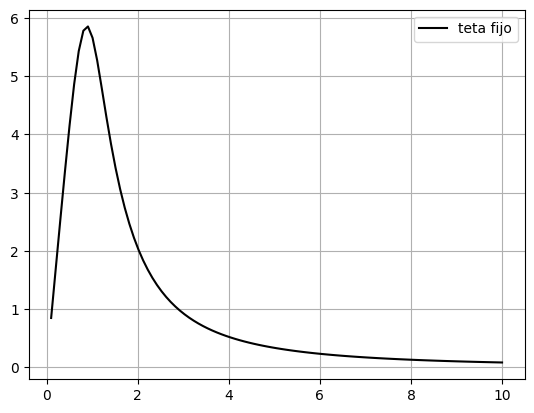

In [38]:
#datos para evaluar teta fijo

r_valores=np.linspace(0,10,100)
teta_=1.1

#debemos hacer un array evaluado para graficar A

A_vector2= [A(a,I,r_val,teta_)  for r_val in r_valores]

plt.plot(r_valores,A_vector2,color='black',label='teta fijo')
plt.legend()
plt.grid()
plt.show()

# 3

(**40 puntos**) El **método de la potencia inversa** es una técnica iterativa utilizada para calcular el autovalor de menor magnitud de una matriz cuadrada. Es una variante del **método de la potencia**, que normalmente encuentra el autovalor de mayor magnitud. Para ello, se aprovecha la propiedad de la matriz inversa:

$$ A^{-1} v = \frac{1}{\lambda} v $$


## Algoritmo

El método de la potencia inversa sigue los siguientes pasos:

1. Elegir un vector inicial $x^{(0)}$ no nulo.

2. Para cada iteración $k$, resolver el sistema lineal:
   
   $$ A y^{(k)} = x^{(k-1)} $$
   
   donde $y^{(k)}$ es un **vector intermedio** que se obtiene resolviendo el sistema lineal. Este vector representa la solución del sistema en cada iteración y es crucial para aproximar el autovector de menor autovalor.

3. Normalizar $y^{(k)}$ para obtener un nuevo vector de iteración:
   
   $$ x^{(k)} = \frac{y^{(k)}}{\| y^{(k)} \|} $$
   
4. Aproximar el autovalor mediante el cociente de Rayleigh:
   
   $$ \lambda^{(k)} = \frac{(x^{(k)})^T A x^{(k)}}{(x^{(k)})^T x^{(k)}} $$
   
5. Repetir los pasos anteriores hasta que la diferencia entre valores sucesivos de $\lambda$ sea menor que un umbral de tolerancia.

---

*a)* Escriba una función llamada `potencia_inversa` que dada una matriz A encuentre su valor propio menos dominante (con una tolerancia de 1e-7 usando la norma Euclidiana) y su correspondiente autovector. Para obtener $y^{(k)}$ puede emplear `np.linalg.solve` recordando que $Ay = x$.

*b)* Usando la matriz A, encuentre el $\lambda_{min}$ y el correspondiente autovector. Examine la convergencia de su autovalor en función de las iteraciones, esto es, haga un gráfico de $\lambda(k)$

$$
\begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}
$$

*c)* Compare su resultado con `np.linalg.eig`

In [39]:
A=np.array([
    [5,2],
    [2,2]
])


In [104]:
def potencia_inversa(A,max_iter,tol):
  #hacemos un guess con el vector x
  x=np.random.rand(len(A)) #vector que se actualiza
  #hacemos un guess con un autov
  eig=random.rand(0)

  valores_=[]

  #iteramos hasta encontrar convergencia
  contador = []
  for k in range(max_iter+1):
    contador.append(k)
    y=np.linalg.solve(A,x) #encontramos x
    x_act=y/np.linalg.norm(y) #normalizamos
    #Rayleigh
    valor= (x_act.T @ A @ x) / (x_act.T @ x)
    valores_.append(valor) #guardamos en el array de valores

    if np.abs(eig-valor)<tol:
      return valor,x_act,contador[:k+1], valores_
    else:
      x=x_act #actualizamos si no ha convergido
      eig=valor
  print('no converge')

In [108]:
valor_min, vector_, contador, valores_=potencia_inversa(A,70,1e-8)
print(valor_min)
print(vector_)
print(contador)
print(valores_)

1.000000000015232
[-0.44721296  0.89442751]
[0, 1, 2, 3, 4, 5, 6, 7]
[1.9636055914115038, 1.0329384196992395, 1.000920853888955, 1.0000255838556085, 1.000000710666191, 1.0000000197407302, 1.0000000005483538, 1.000000000015232]


<ipython-input-104-6f7776d6a8ef>:19: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if np.abs(eig-valor)<tol:


In [109]:
valores_propios, vectores_propios =np.linalg.eig(A)
print(valores_propios)
print(vectores_propios)

[6. 1.]
[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


In [100]:
contador

[0, 1, 2, 3, 4, 5, 6, 7]

concluimos que si era el vp min

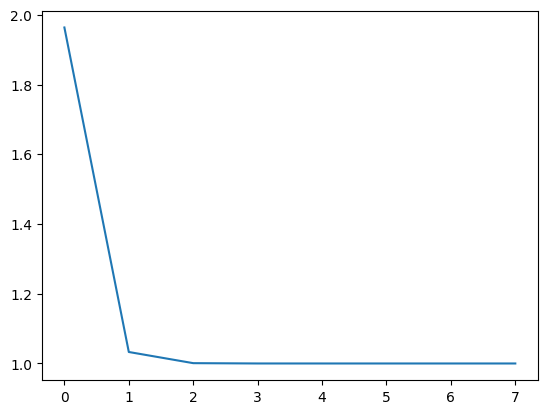

In [110]:
plt.plot(contador,valores_)
plt.show()

#4

**(10 puntos)**
Sea $A$ una matriz cuadrada de tamaño $n \times n$. Se sabe que el determinante de una matriz es igual al producto de sus autovalores:

$$
\det(A) = \prod_{i=1}^{n} \lambda_i
$$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando una matriz aleatoria $A$ de $5\times 5$, demuestre esta propiedad. Puede usar las funciones de `np.linalg`.

In [112]:
#hacemos una matriz aleatoria
A=random.rand(5,5)
val_p=np.linalg.eig(A)[0]
val_p=np.copy(val_p)
val_p

array([ 2.19886473+0.j        , -0.24317231+0.j        ,
       -0.1537399 +0.j        ,  0.31669085+0.08218643j,
        0.31669085-0.08218643j])

In [113]:
val_p[1]

(-0.24317230602266976+0j)

In [114]:
A

array([[0.19819959, 0.80415391, 0.4502132 , 0.60553712, 0.47633328],
       [0.43098654, 0.50206838, 0.78745109, 0.35433928, 0.22385435],
       [0.45870204, 0.02808907, 0.92031668, 0.09631794, 0.45577599],
       [0.46830973, 0.24888119, 0.29101088, 0.55864619, 0.10964304],
       [0.59453092, 0.48674653, 0.77111259, 0.69134081, 0.25610339]])

In [115]:
inverse=np.linalg.inv(A)
inverse

array([[ -0.16006152,   5.52101803,   0.95750941,   8.97293603,
        -10.07363108],
       [  0.73315206,   4.36451398,  -0.74580323,   2.83207361,
         -5.06372891],
       [ -0.86668467,  -1.78534036,  -0.31478593,  -5.30258922,
          6.00285231],
       [ -0.11182995,  -5.43214968,  -0.71119033,  -4.72205132,
          8.2433982 ],
       [  1.88957424,  -1.07246846,   2.06228618,   2.49996757,
         -3.41282063]])

In [116]:
determinante=np.linalg.det(A)
determinante

0.008799876463255255

In [117]:
def factorial(val_p):
  factorial=1
  for i in range(len(val_p)):
    factorial*=val_p[i]
  return factorial

In [118]:
resultado=factorial(val_p)
resultado

(0.008799876463255234+0j)

In [146]:
print(f"{'correcto' if np.isclose(determinante, resultado) else 'no'}")

no
